## Red Wine quality prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(10,10)

In [2]:
df=pd.read_csv('Project_6_SVM_Red_Wine.csv')
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


## Basic data information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


## Data describe

In [4]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


# check the count of null values in dataset column

In [5]:
df.isna().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

### ther is no null values in data

#  EDA

## barchart of Quality_Category value counts

<AxesSubplot:>

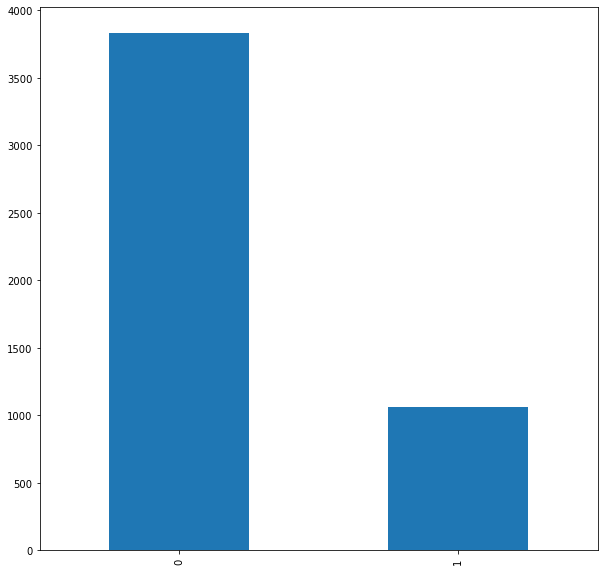

In [6]:
df['Quality_Category'].value_counts().plot(kind='bar')

## scatter plot between volatileacidity & citricacid

<AxesSubplot:xlabel='volatileacidity', ylabel='citricacid'>

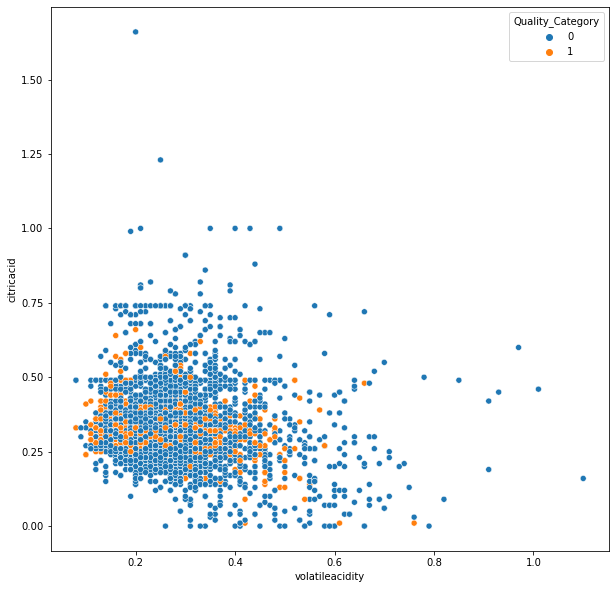

In [7]:
sns.scatterplot(x='volatileacidity', y='citricacid', data=df, hue='Quality_Category' )

## scatter plot between residualsuger & chlorides

<AxesSubplot:xlabel='residualsugar', ylabel='chlorides'>

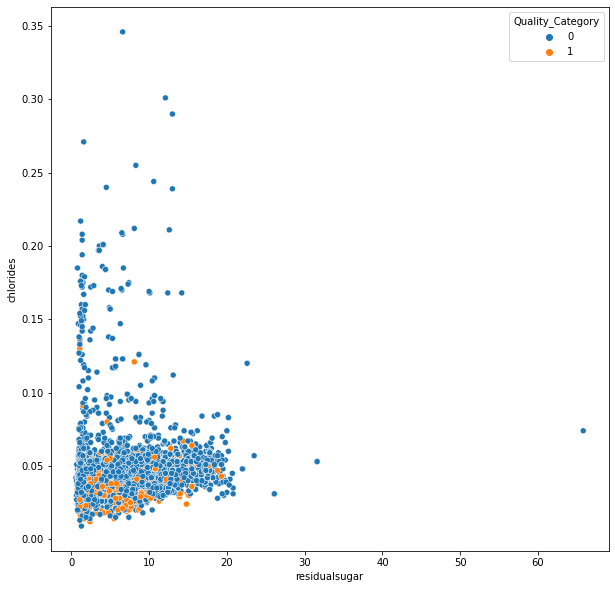

In [8]:
sns.scatterplot(x='residualsugar', y='chlorides', data=df, hue='Quality_Category')

## scatterplot between sulphates and alcohol

<AxesSubplot:xlabel='sulphates', ylabel='alcohol'>

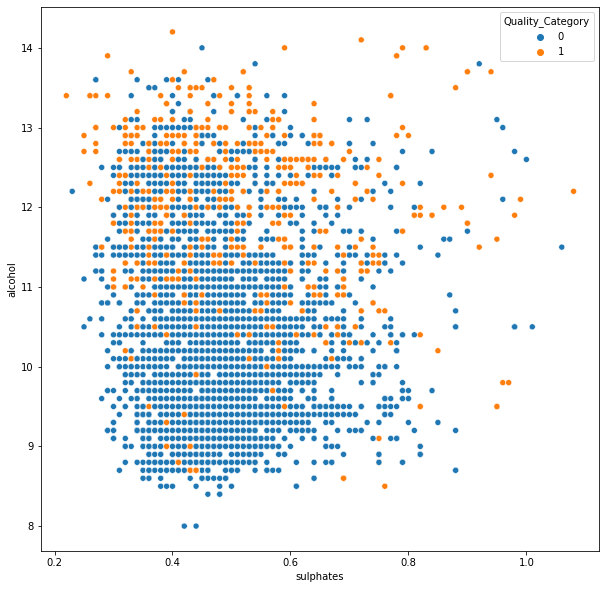

In [9]:
sns.scatterplot(x='sulphates', y='alcohol', data=df, hue='Quality_Category')

## histplot of dataset

array([[<AxesSubplot:title={'center':'Quality_Category'}>,
        <AxesSubplot:title={'center':'volatileacidity'}>,
        <AxesSubplot:title={'center':'citricacid'}>],
       [<AxesSubplot:title={'center':'residualsugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'freesulfurdioxide'}>],
       [<AxesSubplot:title={'center':'totalsulfurdioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

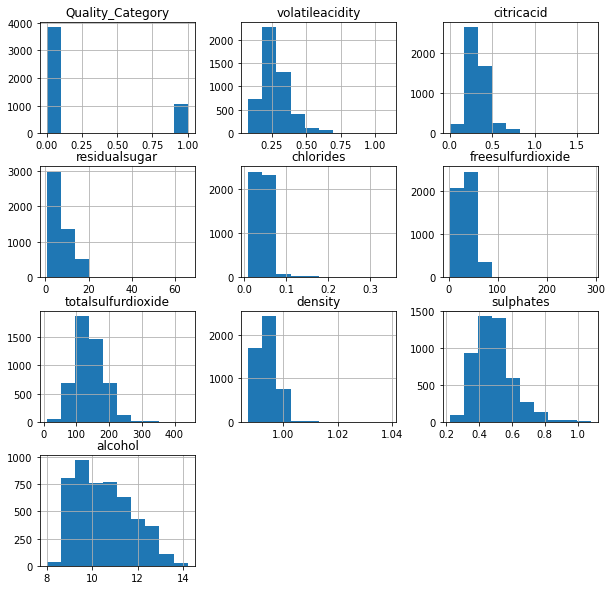

In [10]:
df.hist()

## create features and target data

In [11]:
x=df.drop(['Quality_Category'], axis=1)
y=df['Quality_Category']

## Scaling

In [12]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [13]:
roscaler=RobustScaler()

In [14]:
col=x.columns

In [15]:
x=roscaler.fit_transform(x)

In [16]:
x=pd.DataFrame(x,columns=col)
x

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0.363636,0.166667,-0.439024,0.428571,-0.869565,-0.033898,0.00,0.142857,-0.473684
1,-0.272727,0.000000,0.402439,1.071429,0.565217,0.881356,0.50,-0.500000,-0.263158
2,0.181818,0.666667,0.207317,0.500000,-0.173913,-0.627119,0.25,-0.214286,-0.157895
3,0.545455,-1.333333,0.219512,0.142857,-0.173913,0.033898,0.25,0.000000,-0.421053
4,0.090909,0.333333,1.890244,0.142857,0.478261,0.610169,1.75,-0.142857,-0.842105
...,...,...,...,...,...,...,...,...,...
4889,-0.454545,-0.250000,-0.439024,-0.285714,-0.434783,-0.711864,-0.75,0.214286,0.421053
4890,0.545455,0.333333,0.341463,0.285714,1.000000,0.576271,0.25,-0.071429,-0.421053
4891,-0.181818,-1.083333,-0.487805,-0.142857,-0.173913,-0.389831,-0.25,-0.071429,-0.526316
4892,0.272727,-0.166667,-0.500000,-1.500000,-0.608696,-0.406780,-1.25,-0.642857,1.263158


## split into training and testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Model SVC

In [19]:
from sklearn.svm import SVC

In [20]:
model=SVC()

In [21]:
model.fit(x_train,y_train)

SVC()

In [22]:
y_pre=model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

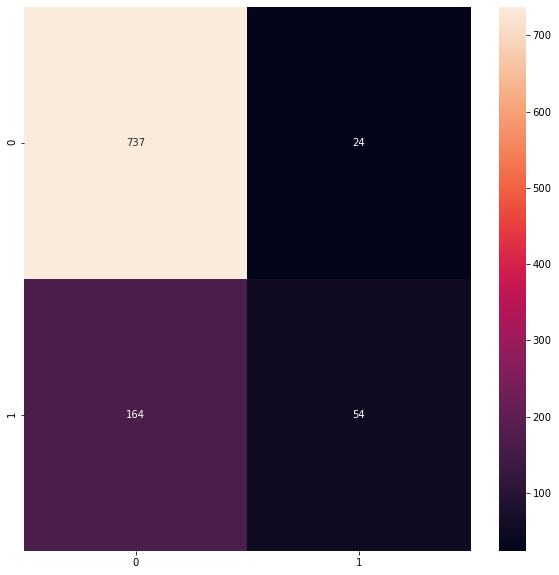

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pre), annot=True,fmt='d')

In [25]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       761
           1       0.69      0.25      0.36       218

    accuracy                           0.81       979
   macro avg       0.76      0.61      0.63       979
weighted avg       0.79      0.81      0.77       979



## with parameter c = 100

In [26]:
model2=SVC(C=100)

In [27]:
model2.fit(x_train,y_train)

SVC(C=100)

In [28]:
y_pre2=model.predict(x_test)

In [29]:
model2.score(x_train,y_train)

0.8937420178799489

In [30]:
model2.score(x_test,y_test)

0.8314606741573034

## Applying All Algorithms 

In [31]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [33]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [34]:
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(y_test,y_pred)}") 
    print(f'{name} accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'{name} precision score: {precision_score(y_test,y_pred)}')
    print(f'{name} recall score: {recall_score(y_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(y_test,y_pred)}\n\n')

lr confuion matrix: 
 [[719  42]
 [169  49]]
lr accuracy score: 0.7844739530132788
lr precision score: 0.5384615384615384
lr recall score: 0.22477064220183487
lr classification report :
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       761
           1       0.54      0.22      0.32       218

    accuracy                           0.78       979
   macro avg       0.67      0.58      0.59       979
weighted avg       0.75      0.78      0.75       979



sg confuion matrix: 
 [[735  26]
 [188  30]]
sg accuracy score: 0.7814096016343207
sg precision score: 0.5357142857142857
sg recall score: 0.13761467889908258
sg classification report :
               precision    recall  f1-score   support

           0       0.80      0.97      0.87       761
           1       0.54      0.14      0.22       218

    accuracy                           0.78       979
   macro avg       0.67      0.55      0.55       979
weighted avg       0.74  